In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [4]:
data1 = pd.read_csv("train.csv")
data2 = pd.read_csv('test.csv')

dataset = pd.concat([data1,data2], ignore_index=True)
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# One hot encoding 
dataset['y'] = dataset['y'].str.replace('"', '').str.strip()
dataset.loc[dataset['y'] == 'yes', 'outcome_num'] = 1 
dataset.loc[dataset['y'] == 'no', 'outcome_num'] = 0

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          49732 non-null  int64  
 1   job          49732 non-null  object 
 2   marital      49732 non-null  object 
 3   education    49732 non-null  object 
 4   default      49732 non-null  object 
 5   balance      49732 non-null  int64  
 6   housing      49732 non-null  object 
 7   loan         49732 non-null  object 
 8   contact      49732 non-null  object 
 9   day          49732 non-null  int64  
 10  month        49732 non-null  object 
 11  duration     49732 non-null  int64  
 12  campaign     49732 non-null  int64  
 13  pdays        49732 non-null  int64  
 14  previous     49732 non-null  int64  
 15  poutcome     49732 non-null  object 
 16  y            49732 non-null  object 
 17  outcome_num  49732 non-null  float64
dtypes: float64(1), int64(7), object(10)
memory usa

In [7]:
dataset['age'] = dataset['age'].astype(float)
dataset['balance'] = dataset['balance'].astype(float)

In [8]:
dataset.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,outcome_num
49727,33.0,services,married,secondary,no,-333.0,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,0.0
49728,57.0,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,0.0
49729,57.0,technician,married,secondary,no,295.0,no,no,cellular,19,aug,151,11,-1,0,unknown,no,0.0
49730,28.0,blue-collar,married,secondary,no,1137.0,no,no,cellular,6,feb,129,4,211,3,other,no,0.0
49731,44.0,entrepreneur,single,tertiary,no,1136.0,yes,yes,cellular,3,apr,345,2,249,7,other,no,0.0


In [9]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous,outcome_num
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892,0.116826
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838,0.321216
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset[["age", "balance"]])

In [11]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X_scaled, dataset['outcome_num'] , test_size = 0.2, random_state = 1)
model = LogisticRegression()
model.fit(X_train, y_train) 

LogisticRegression()

In [12]:
print("The score of this model is:", model.score(X_test, y_test))
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

The score of this model is: 0.8853925806775912
Intercept: [-2.02468038]
Coefficients: [[0.07855623 0.1025039 ]]


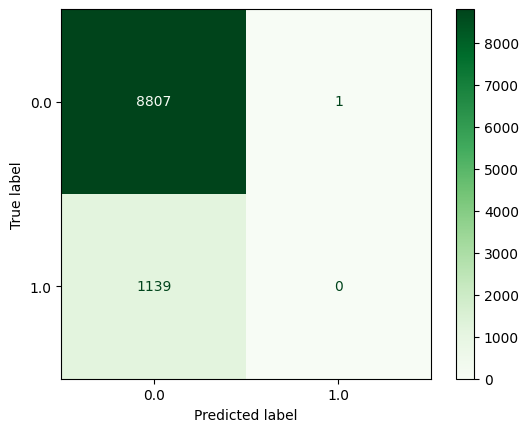

In [13]:
y_prediction = model.predict(X_test)
cm = confusion_matrix(y_test, y_prediction, labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model.classes_)
disp.plot(cmap = 'Greens')
plt.show()

### The model achieves an accuracy of approximately 88.5% on the test set. This suggests that the model is able to correctly classify the outcomes ('yes' or 'no') for a significant majority of the cases based on the 'age' and 'balance' features.

### The intercept −2.53453177 represents the log odds of the outcome being 'yes' when all predictors (age and balance) are zero

### The coefficient for Age is 1.10233151e-02. Although it is small, it is positive, suggesting that older individuals are slightly more likely to say 'yes' to the bank term deposit.

### The coefficient for Balance is 1.02266063e-05. Although it is small, it is positive, suggesting that as the balance increases, the log odds of the outcome being 'yes' increase.

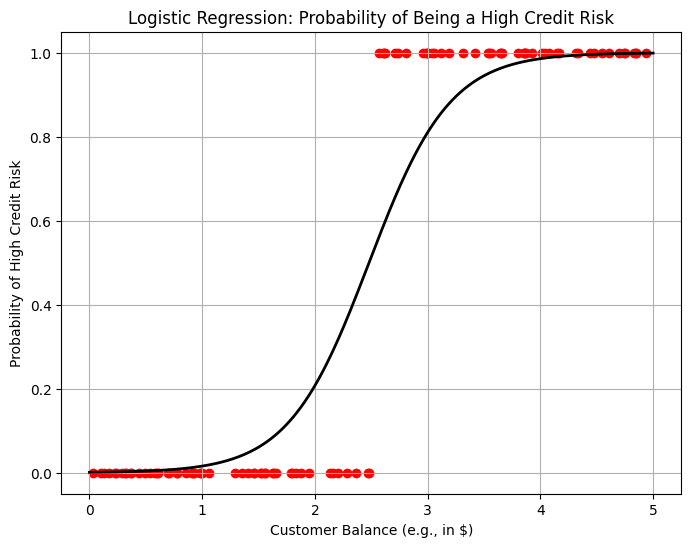

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)  # 100 data points between 0 and 5 (e.g., representing "balance")
y = (X > 2.5).astype(int).ravel()  # Labels (0 or 1) with a threshold at X = 2.5

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Create a range of values to plot the sigmoid curve
X_new = np.linspace(0, 5, 300).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_new)[:, 1]  # Get probabilities for the positive class (class 1, e.g., "High Credit Risk")

# Plot the logistic regression curve (sigmoid function)
plt.figure(figsize=(8, 6))
plt.plot(X_new, y_prob, "k-", linewidth=2)  # Sigmoid curve (probabilities)
plt.scatter(X, y, color="red", marker='o')  # Data points (red circles)


plt.title("Logistic Regression: Probability of Being a High Credit Risk")
plt.xlabel("Customer Balance (e.g., in $)")
plt.ylabel("Probability of High Credit Risk")
plt.grid(True)
plt.show()